In [1]:
# ***************************************************************************************************
# Here you will find a simple version of a Variational Hybrid Quantum-Classical Algorithm based on a
# Parameterized Quantum Circuit (PQC).
# ***************************************************************************************************

# ***************************************************************************************************
# Code from:
# Zickert, F. (2021). Chapter 3: The Qubit and Quantum States
# In F. Zickert, Hands-On Quantum Machine Learning With Python: Volume 1: Get Started, PyQML, 2021. 
# Available on https://www.pyqml.com/
# ***************************************************************************************************

# ***************************************************************************************************
# Modifications have been made by Gustavo Patino.
# Engineering School
# University of Antioquia.
# Medellin, Colombia
# May, 2023.
# ***************************************************************************************************

In [2]:
# Listing 3.1 Verify Qiskit version
import qiskit
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix 
from qiskit_textbook.tools import vector2latex

In [4]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [5]:
# Importing the Qiskit lab. Drive:
import sys
sys.path.insert(0, '..')

In [6]:
# Listing 3.16: Load the data
with open('data/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)

with open('data/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [7]:
# REDEFINE OR IMPORT THE FUNCTIONS OF CHAPTER 2
def run(f_classify, x):
    # Here, the function f_classify is evaluated for each x. So, f_classify will execute the "size of x" times.
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('\nThe precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
#CAPTION A reusable function to unmask the hypocrite classifier

In [8]:
## The Random PQC

In [9]:
# Listing 3.20: Pre‐processing template
def pre_process_random(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """
    quantum_state = [1/sqrt(2), 1/sqrt(2)]
    
    print('The state vector is: ')
    vector2latex(quantum_state, pretext="|\\psi\\rangle =")
    
    return quantum_state

In [10]:
# Listing 3.21: The parameterized quantum circuit (PQC)
def pqc(backend, quantum_state):
    """
    backend -- a qiskit backend to run the quantum circuit at
    quantum_state -- a valid quantum state vector  
    returns the counts of the measurement
    """

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(quantum_state, 0)
    
    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=execute(qc,backend).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)
    
    print('Counts output =', counts)

    return counts

In [11]:
# Listing 3.22: Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    Pre = counts.items()
    print('counts.items: ', Pre)
    
    Prediction = list(map(lambda item: item[0], counts.items()))[0]
    
    print('Given the former angle theta and quantum state, the new prediction is:')
    print('Prediction =', Prediction)
        
    return int(Prediction)

In [12]:
# Listing 3.23: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

In [13]:
classifier_report(
    "Random PQC",
    run,
    lambda passenger: post_process(pqc(backend, pre_process_random(passenger))) #This is the function f_classify.
    , train_input #This is x, whose "size" times the function f_classify will be evaluated.
    , train_labels)

The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
The state vector is: 


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1

The precision score of the Random PQC classifier is 0.35
The recall score of the Random PQC classifier is 0.49
The specificity score of the Random PQC classifier is 0.46
The npv score of the Random PQC classifier is 0.61
The information level is: 0.48


In [14]:
################################################
## Passengers Data Analysis
### 1. Data Correlations
################################################

In [15]:
df = pd.DataFrame(train_input,columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
print (df)

# Sex = 0 represents female. 1 represents male.

     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0       1.0  1.0  0.367204  0.000  0.000000  0.015127       0.5
1       0.0  0.0  0.367204  0.125  0.000000  0.285990       0.0
2       1.0  1.0  0.321438  0.125  0.000000  0.015330       1.0
3       0.5  0.0  0.296306  0.125  0.333333  0.126872       1.0
4       1.0  0.0  0.560191  0.125  0.666667  0.054457       1.0
..      ...  ...       ...    ...       ...       ...       ...
706     1.0  0.0  0.396833  0.125  0.166667  0.030254       0.5
707     0.0  1.0  0.367204  0.000  0.000000  0.054107       0.0
708     1.0  1.0  0.246042  0.000  0.000000  0.019218       1.0
709     1.0  1.0  0.290023  0.000  0.000000  0.014110       0.0
710     0.5  1.0  0.220910  0.000  0.000000  0.022447       1.0

[711 rows x 7 columns]


In [16]:
#print (df["Age"])

In [17]:
#max(df["Age"])

In [18]:
#corrMatrix = df.corr(method = "pearson")
#print(corrMatrix)

In [19]:
#corrSpearMatrix= df.corr(method = "spearman")
#print(corrSpearMatrix)

In [20]:
def display_correlation(dfr, my_meth):
    r = dfr.corr(method=my_meth)
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(dfr.corr(method=my_meth), vmin=-1, 
                      vmax=1, annot=True)
    plt.title(my_meth +" correlation")
    return(r)

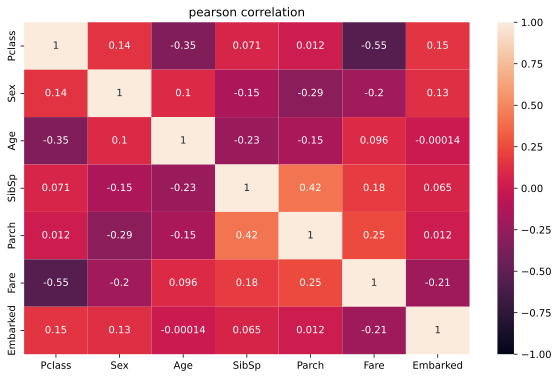

In [21]:
person_map=display_correlation(df, "pearson")

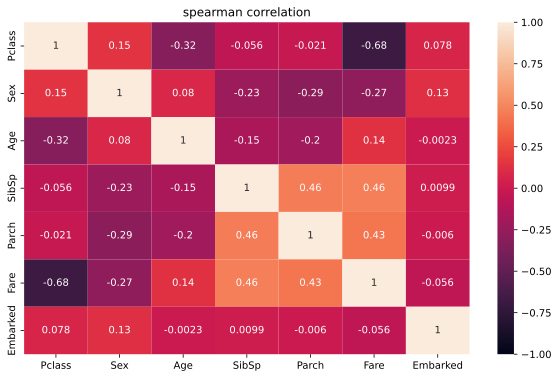

In [22]:
spearman_map=display_correlation(df, "spearman")

In [23]:
################################################
### 2. Data Ranking
################################################

In [24]:
dfrank=df.rank()
dfrank

#dfrank.shape

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,510.5,480.5,381.5,241.0,274.5,103.5,168.0
1,82.0,125.0,381.5,566.0,274.5,685.5,67.5
2,510.5,480.5,246.5,566.0,274.5,147.0,456.5
3,236.5,125.0,208.5,566.0,670.0,625.5,456.5
4,510.5,125.0,628.5,566.0,705.0,517.0,456.5
...,...,...,...,...,...,...,...
706,510.5,125.0,492.5,566.0,594.5,387.0,168.0
707,82.0,480.5,381.5,241.0,274.5,509.0,67.5
708,510.5,480.5,132.5,241.0,274.5,278.0,456.5
709,510.5,480.5,197.0,241.0,274.5,50.0,67.5


In [25]:
#FareRanking = df["Fare"].rank()
#print(FareRanking)

In [26]:
#FareRanking.corr(train_label_series, method='spearman')

In [27]:
#dfrank["Sex"].corr(train_label_series, method='spearman')

In [28]:
train_label_series=pd.Series(train_labels)
print(train_label_series)

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
706    0.0
707    0.0
708    0.0
709    0.0
710    0.0
Length: 711, dtype: float64


In [29]:
################################################
## Variational Hybrid Quantum-Classical Algorithm with Passenger Information
################################################

In [30]:
# Listing 3.24: weigh a passenger's feature
def weigh_feature(feature, weight):
    """
    feature -- the single value of a passenger's feature
    weight -- the overall weight of this feature
    returns the weighted feature 
    """
    return feature*weight

In [31]:
# Listing 3.25: Calculate the overall probability
from functools import reduce

def get_overall_probability(features, weights):
    """
    features -- list of the features of a passenger
    weights -- list of all features' weights
    """
    return reduce(lambda result, data: result + weigh_feature(*data), zip(features, weights),0) #result = result + weigh_feature(features, weights), starting at 0.
#   *data =tupla(features, weights)
#   https://www.programiz.com/python-programming/methods/built-in/zip

In [32]:
# separate the training data into a list of the columns
columns = [list(map(lambda feature: feature[i], train_input)) for i in range(0,7)] # https://www.w3schools.com/python/ref_func_range.asp
#print(columns)

In [33]:
# Listing 3.26: Calculate the correlation coefficients
from scipy.stats import spearmanr

# calculate the correlation coefficient for each column
correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
#correlations

In [34]:
dcorr = pd.DataFrame(correlations,index =['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'], columns = ['Ranking Correlation = Feature Weight'])
dcorr

,Ranking Correlation = Feature Weight
Pclass,-0.344766
Sex,-0.518456
Age,-0.025080
SibSp,0.095559
Parch,0.127698
Fare,0.310622
Embarked,-0.184166


In [35]:
# Listing 3.27: The weighting pre‐processing
from math import pi, sin, cos

def get_state (theta):
    """returns a valid state vector from angle theta"""
    return [cos(theta/2), sin(theta/2)]

In [36]:
def pre_process_weighted(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """

    # caluclate the overall probability
    mu = get_overall_probability(passenger, correlations)
    print('Overall Probability =', mu)
        
    # theta between 0 (|0>) and pi (|1>)
    quantum_state = get_state((1-mu)*pi)
    
    vector2latex(quantum_state, pretext="|\\psi\\rangle =")  

    return quantum_state

In [37]:
backend = Aer.get_backend('statevector_simulator') 

In [38]:
# Listing 3.28: Run the PQC with the weighted pre‐processing

classifier_report("Variational Hybrid Quantum Circuit with Data Train", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    train_input,
    train_labels)

Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.0915700222443043


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0387423503683644


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.2700602367485777


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4289886968347164


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.27667164408294465


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0550742028652944


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0552396683649428


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5121344908705187


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8701391492352405


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.654083973030288


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.06131004774916509


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8609105631883716


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0540112289803172


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.048214024263405


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.1248427907257486


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.35784826211639753


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0523141932436393


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.1504881357088405


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0230870904560634


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6978365499288787


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6951480980852354


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5773680829857101


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8842142095188468


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6861245447456775


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5312431154817807


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.009472804917682095


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.35855971512478924


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8597940447859241


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7053017568937582


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.477868652677922


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.21999176190432376


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9531993817774514


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8777058106920127


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.33784757639287927


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0530897799725565


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.022582715455004232


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0230870904560634


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.682757450418195


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.16041254922596052


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5084620451690246


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6188648637435523


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0202995234595384


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3573591365164167


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.042422747626927


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.2928382179248247


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.35609851490381195


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.040177944327784


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0482014133564292


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4370600533306774


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0300776144625743


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6643383914954122


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.523716103581441


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.531018904119321


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.09347570311753726


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.036808492362251


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.047076621448633


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.053243112442395


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.054443892058992


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4928971045977578


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.12610341233835337


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8266200696990087


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5313372082617409


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0525781814540367


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0464757617381184


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8656394095057022


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.35609851490381195


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4873052826994737


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.005332602987532


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14288779387444386


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8833786079487341


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0487963166162224


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.44162980667636964


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.32025951881871734


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.03879153349388167


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0490685464321672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9603558063182286


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.050544519545654


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0525352558668304


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6880640176081733


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3573591365164167


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0507352674886146


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4365756207531192


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.1097664226877734


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.31050451610354035


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0223439832292764


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.29972384357373016


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.049401405608573


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.42535836975921865


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.0030724712853299734


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.49836762318783845


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6001390449050419


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5319643703287745


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.043141782636116656


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0480472935221374


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0467096199673371


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5006968401411092


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4891365701496331


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0581322664229755


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8833514420077724


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051317559841432


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8754997228699544


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0530897799725565


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.289360006138317


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4758994296076414


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3332667445936695


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.874869412063652


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0483062494956166


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0482291816035203


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.33190407686484125


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.30045652614354174


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8777058106920127


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.867617906010031


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0223439832292764


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8130382300386425


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0525529596400849


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4112432320001547


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0473607832861629


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0658627268398717


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8842142095188468


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8805902437237592


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.36241363156768214


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.30243755108136094


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0586007542959652


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0491468795658827


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.09884918575117985


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6133263604750392


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6997881117082468


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.055926178600917


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.10230059365440569


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5106853302497906


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8588245613747777


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.37427269549205827


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.048753391029016


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14563571545344964


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8149852962469604


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680478563104271


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0503197218269655


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8742391012573496


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8744942136562686


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.032546444274652


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8690814429532733


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4223282774541963


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3287687147037995


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8218843424094533


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0504958987860396


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.19776399756172214


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.32849463226531067


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8767003014783269


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6909233393497703


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.49566518671653736


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.04816983779733455


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.048992759731591


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9544453870612859


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.0706879758688212


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.31287872433744884


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0547413436888886


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9632371024645703


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0345248587709301


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0067922460484464


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.960243126134634


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35784826211639753


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5299275596811232


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8893065176043745


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.43707017843387436


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.44128109942059385


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0504889224221114


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5309974493006682


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6936425854428352


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3449801263600944


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0378480513516646


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9199960937783991


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.034584782393132854


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.40311612903746613


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.47498551392505456


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5109533910539876


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.33326425878989063


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5293566289435632


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9251527946361184


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.049320216913703


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0576206679044557


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3362717993771233


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4706214545055737


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0506348772301168


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0086615842945326


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14648599392026362


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3362321923030328


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.15092513618914233


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0490685464321672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.48689996802308766


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.44143267282174625


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8312218502766684


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.34664092102813254


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35757133927803


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8550426965369634


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.07350659772575173


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.08829709488557584


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3658082893972666


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.67225388873296


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3617713121605334


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0211961580371562


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5036560154188806


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5297582825067162


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0515354577754534


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6657557112752495


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.03880895308034429


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.31730440248554753


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.533563766985083


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4943244569516302


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4481204294512515


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8676879196261849


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5310340614594362


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6957342983787379


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8852815489684877


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.047416982715835


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9593857365508534


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.0710203731179615


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0223439832292764


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8305379630518301


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8755117314708007


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7059320677000606


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8367746968653772


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5175159481599552


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.420122189632138


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0518291583599517


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.038475213418698


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.32493382168268836


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5053414401158522


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.1557279291839773


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8676437009935944


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5328365962707913


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.45903662642643095


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8165049394733055


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0502742338567193


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0072235354064392


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.048731936210363


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6897904562316651


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0540560986945335


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.48064341476070177


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9478702756442331


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8268262216432496


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0491114720193735


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35540816109327733


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0513529673879412


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.38971828977264145


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9709584098417745


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.46142527150921486


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3126229624481223


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.46558323433469284


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9585424073022515


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0273848369206953


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.2978533259314654


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.13874644754652127


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0510378119847898


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0584474218261266


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6933394386405305


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0487603673929442


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.049716561011724


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35784826211639753


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5333046062666149


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9583572259526452


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.17183293067196778


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0508372362127834


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35861975812902147


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5176506051523061


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6490590477771417


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680504027435666


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9571016972063191


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.0017828002341140625


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.052868115043236


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3640494515876703


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9597671558575133


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6971077164118272


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9884636986340726


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0518954988427216


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3545337720907806


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.025193513050322587


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.420999447811073


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5152872328067866


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5284496424406264


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0506450023333138


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5346473280082341


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.05009580364262


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0496287657103016


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0483624489252885


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.46558323433469284


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4413695576575064


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.047895720120985


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6960677598612732


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7024653582653975


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0534049353757076


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0489106755524773


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5338072842941967


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3566687827058821


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5108582984067577


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.7147805886299653


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.061179718525816815


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.813983696248096


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6710938566950526


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.878591233897234


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.28885891976302325


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8578790951653241


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.43631941703651855


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6975820238861885


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0497417828256759


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.28802059567492444


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6916433130052442


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8767603444825591


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3121494129432313


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0562413340040684


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598252994141953


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.05585354063961


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6736649093422348


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8763040038730865


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0525352558668304


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0500923457753364


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.13250896794912895


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4390064763470375


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.514448656100195


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8681631991640512


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0479652093430236


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680478563104271


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35988037974162623


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3594736939415549


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.46558323433469284


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.433310200902625


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8299756883063458


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0107308090534932


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5018033259695215


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0547413436888886


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6857745644154811


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8726633242415937


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0350035961760802


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.049462034969034


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5228755660403367


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0506620272211777


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.128552902179052


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4389509857495845


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0506620272211777


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4229585882604987


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0486776043284398


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9556622368345619


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680478563104271


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35603536294876414


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0562413340040684


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.36801437721932495


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6741448211518671


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8742391012573496


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680478563104271


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.34194459663384474


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.874869412063652


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.033112663757173


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8593347861726156


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7068775339095141


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0492838979330492


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.05255502878768335


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6952167839929201


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6479541101451944


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.30848698462347385


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8505746611582382


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.44433856461343724


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9498719591954026


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4413114141008243


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6707721106352494


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0218264688434586


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0491443331327435


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8713147531955631


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6978971792893397


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8551649767008812


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0465378569891512


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0372279900775225


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.09908340924113733


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8842142095188468


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.04331996752180338


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4411244937825232


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.30216558919425046


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8308356777987933


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8359825611627192


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.048992759731591


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8802270539172222


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8798518555098388


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9570675549014293


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3547148755015991


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4903841348778972


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.050667059458096


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8761271018951131


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9805848135552928


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3125395517326048


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5099163944476139


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0505123373176748


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8706572199690291


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8842142095188468


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14990348571797224


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8842142095188468


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0503468718180264


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9193657829720967


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.33784757639287927


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.031072712279728326


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8773306122846293


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7014031717448734


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051680733698068


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4598494944934589


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0494777946152787


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7005744258464903


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.43863583034643333


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.058018335243268264


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9605582815377852


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8736058586699036


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9840389760913819


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3049982795061826


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4658751626465254


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9209415599878527


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3495921145537383


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7932654000976345


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8795367001066876


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.045517864735050345


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0568962483682924


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4382966577415892


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5330020617704396


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8735727646485079


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0370446963756563


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7013311201397948


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0529413553106728


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0549566951897706


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8827482971424317


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8572487843590217


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0522013968231547


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0509771826243288


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.31701678953051293


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8730481079128946


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.45598629250021194


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0483624489252885


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6939595280777093


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8792815877077687


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.1408961943280972


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8656419559388416


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.688832594381336


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.316476372789383


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4460259015353477


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6593049818646959


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8745542566605008


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8641822032283479


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.40338510404219474


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.33028477276854307


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.49069415032266983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8650090986993998


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8669593633373472


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.40376846747586453


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8764451890794079


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3425749074401471


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.48031214912564474


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0449042299540996


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.17033256926665963


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6942457567791878


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0534049353757076


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.441367011224367


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0277329619162787


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8299594883085619


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8742391012573496


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0162871015733013


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8636648992133447


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8481102037189295


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.358777335830597


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8802270539172222


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6482756055092251


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.28802059567492444


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.038269290462572964


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0348907997555956


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8905671392169793


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.31164147043612944


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.03583951566289788


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.011983157160749


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.71183139358112


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8674413420109278


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8709723753721804


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.18621570433076695


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0160118608921334


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8369280273721729


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0522700024148137


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7098581881880107


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.10039961290160705


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.18375569277214782


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.11480560657497733


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0522013968231547


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8609105631883716


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0516201043376072


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.035785480383535


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8302053669924909


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3605106905479286


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.7068958399888983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.32865220996688627


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.46612713293213226


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8842142095188468


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8687019636235326


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.14435141906814236


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0521635034728667


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0522013968231547


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6816440648051156


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3019632302115839


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0523110445043704


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8392808643681448


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680478563104271


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6373583685726316


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9431715002085096


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0444518551755573


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0508596749488053


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9878684297129404


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6961132318816189


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.33469602236136736


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4413594325543094


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.050568536747347


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.1337548600519648


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.15029482538283995


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0302212355490559


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4472914679787112


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4677977859711633


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6995497310190774


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0486049663671324


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.03934548650910122


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.7059320677000606


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598303316511135


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0482967873279094


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8671485410067099


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5090545749330444


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6724105869001925


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.2190462956948702


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8880458959917698


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.04315507242848313


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0484559393991193


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0518291583599517


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598277852179742


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14104405144619445


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3400536642149376


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.42471575845182064


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8782760784940828


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.052459469166254


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0520195087417719


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0512923380274801


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0518830926807348


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0519867360615272


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7040411352811534


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8280457702911919


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.04851973344875


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8625733321911963


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.26630046245586353


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6906111174197878


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.06504071817760557


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5307795354167459


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0515140029568004


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5322315072784407


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6719178808172854


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.861030649196836


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.17113720543418792


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.051525353003666896


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8680504027435666


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0497929500184298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.44128109942059385


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.972691764559106


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5199285276213179


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8763040038730865


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8763323926589234


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0538135812526896


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.842405950156528


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0474419920269702


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8777058106920127


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3591900259310916


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6513659466865891


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0523226555440766


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9547605424644372


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5185954698132325


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8763040038730865


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0559141700000707


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.26618766603537897


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.0709853545005422


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.06577659187694262


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0572082550321749


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.517200792756804


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.44128109942059385


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8713997708478453


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9779900808469966


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0516784685891791


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0503197218269655


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8764451890794079


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.049868736719006


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.960300209194686


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5141226488587541


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0518830926807348


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0565564894072195


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6966752383914762


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0507384162278834


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7150957440331165


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.2776239664242063


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.04625851023535929


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.30014137074039055


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4341133292144602


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0263073845809934


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.04270100171543356


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9596128153283316


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.08798641121137687


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6815167133506453


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0493079151347422


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.042986981053892606


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8680478563104271


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0487963166162224


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.136799996213928


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.361141001354231


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.49966913306605376


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5786899940730521


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.056610821289143


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14390524855479728


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9598227529810559


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5332606201827783


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0484559393991193


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.04657366563851048


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3375324209897281


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0558566893788786


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4867069817503069


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.047416982715835


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6679517665232726


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3658082893972666


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.18344053736899663


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3402487336096244


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.049401405608573


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0363909866236911


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8508898165613894


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.06503019877795863


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5164350579989067


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9379270605286374


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4400290629025223


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.28369617421232446


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.047805768189736


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5117352904537409


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8697117537595757


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.09946365577740988


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5297684235598139


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3071914832890879


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5298505077389277


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5285052555140698


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9265278261060208


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8299594883085619


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0586293099075095


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0551340448613022


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9550903141963586


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5083286088310115


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.2866567208604087


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6925067688515615


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680504027435666


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.29548107214864205


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8253510518441165


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.1386431522859487


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6541162637373298


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.020959031327367497


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.032397120032488


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.33512768250143177


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8680504027435666


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14338643090032666


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.068113137395143


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.038475213418698


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.869332274429835


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.04829295970325


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.883402625150427


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.047805768189736


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.15159205915421275


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.873548747446815


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.42471575845182064


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.052220100463679


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0475837134571027


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4080720843493319


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8783361214983151


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7005744258464903


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.956336319480193


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.40417580965421995


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5108582984067577


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.047588822273282


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8661121426104289


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8735727646485079


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0

The precision score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.70
The recall score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.60
The specificity score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.85
The npv score of the Variational Hybrid Quantum Circuit with Data Train classifier is 0.78
The information level is: 0.73


In [39]:
# Listing 3.29: Test the PQC‐based classifier on data it has not seen before

classifier_report("Variational HQC with Data Test", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    test_input,
    test_labels)

Overall Probability = -0.36076580294684757


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.042511471829814275


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8598923077481491


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8757548352688733


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8729784796447448


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0473607832861629


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5321885816912343


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.315619054159038


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8063691953102585


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6668596347206217


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8830754611464293


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9407158111803666


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.47474286945725086


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051809852413298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0490591002143608


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8330642860069163


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0563171207046447


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0626978830159934


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.32740784101479947


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8681606527309117


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0485291796665561


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4653831985831877


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.34959466098687764


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5314704755835093


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3579894473227191


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8760699906720245


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5325037370943855


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.327248797422652


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9458686615756493


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.03630256216327153


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.05675870486588282


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6409658183825999


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0484559393991193


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4576114511075943


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.1545788567792436


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5228116823240861


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.14467805916591148


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8776457676877805


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.44133669654413654


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4430231929946107


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8778302181522034


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5865688791518319


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0441120962144845


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.053979046752338


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8641511965753679


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0500317164148754


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9551163988752748


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.07148760469777762


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.14198951765564802


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6115538736966929


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0499382259410446


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.05127986577621946


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8754997228699544


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8744942136562686


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.05418506417744219


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = 0.07274499562449234


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5096583221045146


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.13663187580207778


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.11050546039210132


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6260198259757773


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3170432577736416


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.7144654332268141


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0540320814928406


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.34434726912065267


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5075203140550686


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4741403109481389


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.35925006893532385


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0519226488337825


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5164350579989067


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6803041261414263


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5173614118354599


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0149380511187671


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0590511689975968


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.032546444274652


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5306905674028659


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5382826357319136


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.7017882942472294


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5196887902782416


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.13152023006344452


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.43792718640641537


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8792815877077687


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.059865621140307


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8763040038730865


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6930362918382257


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8700588546918614


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.39879332050553407


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.47994782908899236


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0497929500184298


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.30805532448340944


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0341132179786257


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4694126879562516


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8779609230909317


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0491594904728585


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.41947131877194854


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.061453699935024


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0576718350972096


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.034584782393132854


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.14998685108860604


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.047798478601756


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0486214048987677


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.34122493363617495


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.35988037974162623


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.050950032633268


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8665874221482952


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8680504027435666


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9392082421951292


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.31419938895428584


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3268615904144222


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8676437009935944


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0085377781157756


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.690307970617483


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.11283062289859078


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0074452928649216


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.055202500045353174


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5132567203952749


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.10359666997904313


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.4937550966964669


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.21873189818295868


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8265110662400983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0174945640164401


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9222242092325534


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4848020715472482


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.702118113163429


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9591727181085539


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.2648733612706139


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0524083019735002


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6957342983787379


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5563846643838586


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.3457507788100446


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5157110519737844


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0512923380274801


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8764451890794079


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0525352558668304


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8354989995303305


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5332606201827783


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8369082627629438


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.42138281124474275


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.5180805207896172


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9388248787614595


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.3214554334177583


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0473607832861629


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5458170681874847


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.8758148782731056


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.051345007106644


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9168445397468872


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6448126454279356


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5148084954016365


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9598151743109983


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.6700111887521336


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6687871792982969


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.6934402264601686


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -1.0517163619394672


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.71183139358112


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4879924532739415


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.14442157590885232


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.874869412063652


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8148822801147845


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.42471575845182064


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8353971163902897


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.4836719324557083


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8821179863361294


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0493079151347422


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = 0.06875748356010163


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.9950812701274979


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.8682371183168786


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0508596749488053


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0539657569599714


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7003856539303412


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.9431715002085096


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.5428413684901651


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7015198920559439


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -1.0626977745369308


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.7095131520208793


<IPython.core.display.Math object>

Counts output = {'0': 1}
counts.items:  dict_items([('0', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 0
Overall Probability = -0.41388707064416436


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1
Overall Probability = -0.1363380007417963


<IPython.core.display.Math object>

Counts output = {'1': 1}
counts.items:  dict_items([('1', 1)])
Given the former angle theta and quantum state, the new prediction is:
Prediction = 1

The precision score of the Variational HQC with Data Test classifier is 0.72
The recall score of the Variational HQC with Data Test classifier is 0.61
The specificity score of the Variational HQC with Data Test classifier is 0.82
The npv score of the Variational HQC with Data Test classifier is 0.73
The information level is: 0.72


In [40]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright